# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

We are  tasked to understand electric car usage by solving for another research question

### b) Defining the Metric for Success

In this Kernel we used the CRISP DM to define the measure of success in this suquence,
Business Understanding
 Data Understanding
 Data Preparation
 Modeling
 Evaluation
 Deployment.

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [963]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# PCA
from sklearn.decomposition import PCA



In [964]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = "autolib_daily_events_postal_code.csv"
# ---
# 
df = pd.read_csv("autolib_daily_events_postal_code.csv")
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## 3. Checking the Data

In [965]:
# Determining the no. of records in our dataset
#
df.shape

(16085, 13)

In [966]:
# Previewing the top of our dataset
#
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [967]:
# Previewing the bottom of our dataset
# 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [968]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [969]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [970]:
df.duplicated().sum()

0

In [971]:
df["n_daily_data_points"].values


array([1440, 1438, 1439, ..., 1440, 1440, 1370])

In [972]:
df['BlueCars_returned_sum'].count()

16085

In [973]:
df['BlueCars_taken_sum'].values

array([110,  98, 138, ...,  33,  11,   2])

In [974]:
df['Utilib_returned_sum'].values

array([2, 1, 0, ..., 1, 5, 1])

### a.Validation

## 5. Tidying the Dataset

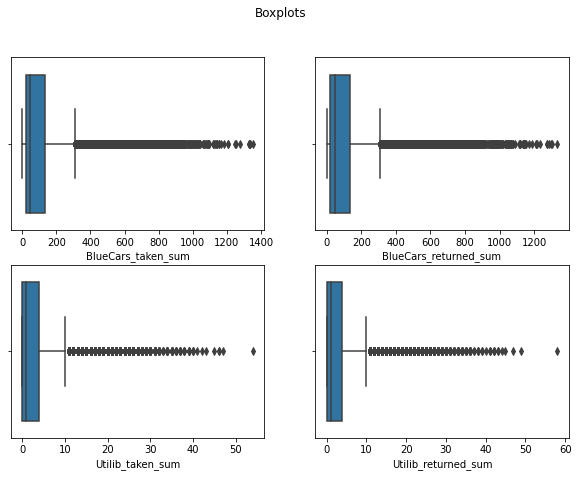

In [975]:
# Checking for Outliers
#
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(df['BlueCars_returned_sum'], ax=ax2)
sns.boxplot(df['Utilib_taken_sum'], ax=ax3)
sns.boxplot(df['Utilib_returned_sum'], ax=ax4)
plt.show()

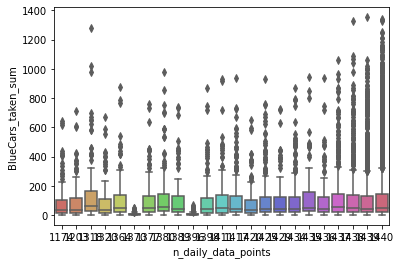

In [976]:
# Checking for Outliers


sns.boxplot(x='n_daily_data_points',y='BlueCars_taken_sum',data=df,palette='hls')

In [977]:
#Checking for annomalies

def find_anomalies(value, lower_threshold, upper_threshold):
    
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='BlueCars_taken_sum', threshold=1.1):
    
    df = data.copy()
    quartiles = dict(df[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    df['Predictions'] = df[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    return df
  
iqr_df = iqr_anomaly_detector(df)


Lower threshold: -106.50000000000001, 
Upper threshold: 261.5



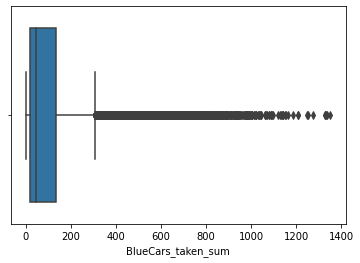

In [978]:
sns.boxplot(df.BlueCars_taken_sum)
plt.show()

In [979]:
df.isna().sum().any()

False

There is No Null Values in the Data

## 6. Exploratory Analysis

-**Univariate Analysis**

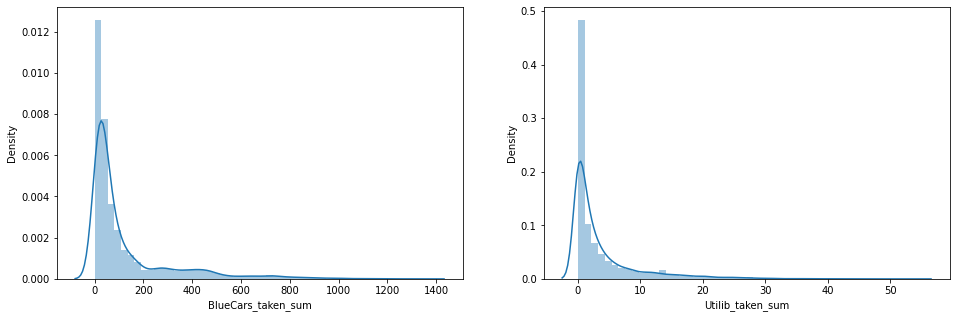

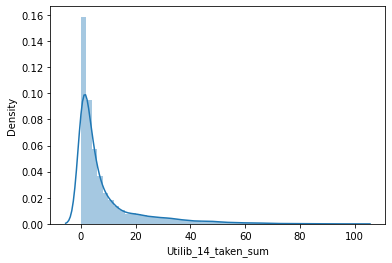

In [980]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['BlueCars_taken_sum'])
plt.subplot(1,2,2)
sns.distplot(df['Utilib_taken_sum'])
plt.show()
sns.distplot(df['Utilib_14_taken_sum'])
plt.show()

(array([1.2077e+04, 1.4740e+03, 9.9900e+02, 7.6700e+02, 2.8800e+02,
        2.7600e+02, 1.2700e+02, 5.0000e+01, 1.9000e+01, 8.0000e+00]),
 array([   0. ,  135.2,  270.4,  405.6,  540.8,  676. ,  811.2,  946.4,
        1081.6, 1216.8, 1352. ]),
 <a list of 10 Patch objects>)

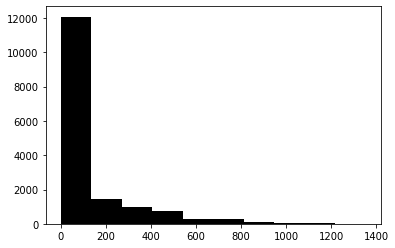

In [981]:
plt.hist(df['BlueCars_taken_sum'],color='Black',bins=10)

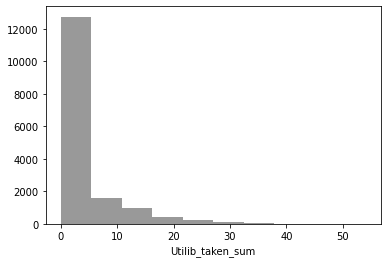

In [982]:
sns.distplot(df['Utilib_taken_sum'],kde=False,color='Black',bins=10)

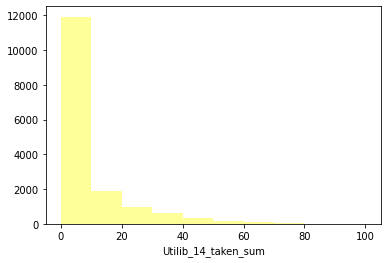

In [983]:

sns.distplot(df['Utilib_14_taken_sum'],kde=False,color='Yellow',bins=10)

**Observations**

The Utilib 14 Cars are used mostly compared to the Bluecars and Utilib Cars

**Bivariate Analysis**

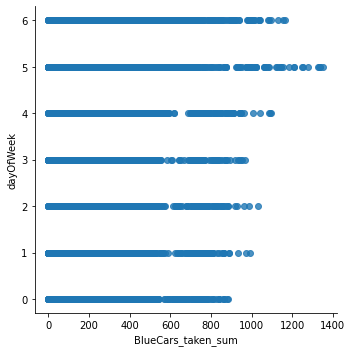

In [984]:

sns.lmplot('BlueCars_taken_sum', 'dayOfWeek', data=df, fit_reg=False);

We can observe that the Blue Cars are used more on the 5th Day of the Week.Our first day of the week is 0 Mondays all through 6 Sunday,hence the 5th day being Sartuday.

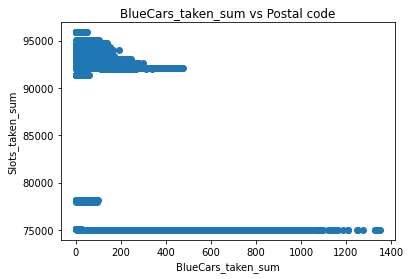

In [985]:

# Plotting our scatterplot
plt.scatter(df['BlueCars_taken_sum'], df['Postal code'])

# Giving our scatterplot a title
plt.title('BlueCars_taken_sum vs Postal code')

# Labelling our x axis
plt.xlabel('BlueCars_taken_sum')

# Labelling our y axis
plt.ylabel('Slots_taken_sum')

# Displaying our scatterplot
plt.show()


We can observe that the areas around the 7500th Mark of the postal codes use more of the Blue Cars.The name for the Postal area is France.So the Bluecars are used mostly in Paris,France

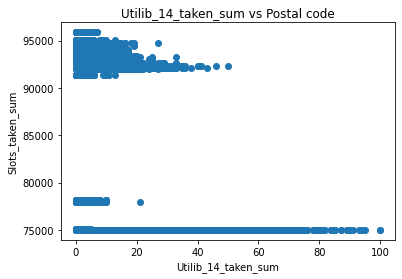

In [986]:

# Plotting our scatterplot
plt.scatter(df['Utilib_14_taken_sum'], df['Postal code'])

# Giving our scatterplot a title
plt.title('Utilib_14_taken_sum vs Postal code')

# Labelling our x axis
plt.xlabel('Utilib_14_taken_sum')

# Labelling our y axis
plt.ylabel('Slots_taken_sum')

# Displaying our scatterplot
plt.show()

Similarly in the observation above,we can see the areas around the 7500th mark use more of the Utilib14 Cars.

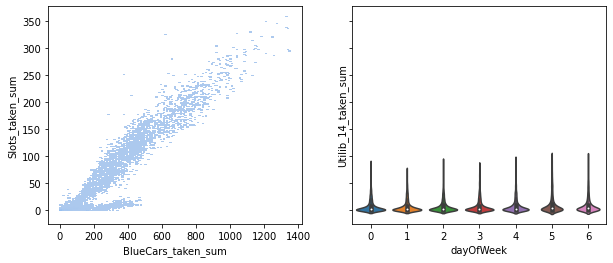

In [987]:


_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.histplot(x='BlueCars_taken_sum', y='Slots_taken_sum', data=df, ax=axes[0]);
sns.violinplot(x='dayOfWeek', y='Utilib_14_taken_sum', data=df, ax=axes[1]);

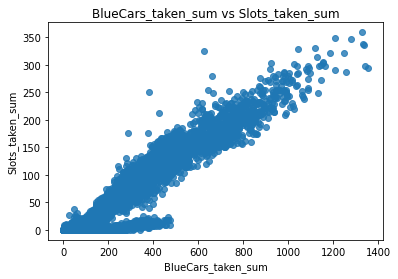

In [988]:

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = df["BlueCars_taken_sum"], y = df["Slots_taken_sum"], fit_reg=False)

# Giving our scatterplot a title
plt.title('BlueCars_taken_sum vs Slots_taken_sum')

# Labelling our x axis
plt.xlabel('BlueCars_taken_sum')

# Labelling our y axis
plt.ylabel('Slots_taken_sum')

# We then display our scatterplot as shown below
plt.show()


We caan observe that their is a positive correlation between sum of Bluecars taken and the charging slots taken.
This means,an increase in the number of blue cars taken will result to an increase to the charging slots taken

## 7. Implementing the Solution

Hypothesis Testing

Normality Test

In [989]:
# Importing matplotlib
from matplotlib import pyplot
import pandas as pd

# Importing functions from numpy
from numpy.random import seed
from numpy.random import randn

In [990]:
import pandas
import random

filename = "autolib_daily_events_postal_code.csv"
1 #number of records in file (excludes header)
n = sum(1 for line in open(filename)) 
#desired sample size
s = 100 
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df1= pandas.read_csv(filename, skiprows=skip)

In [991]:
df.isna()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,False,False,False,False,False,False,False,False,False,False,False,False,False
16081,False,False,False,False,False,False,False,False,False,False,False,False,False
16082,False,False,False,False,False,False,False,False,False,False,False,False,False
16083,False,False,False,False,False,False,False,False,False,False,False,False,False


In [992]:

# imporing the shapiro function
from scipy.stats import shapiro 



# generating univariate observations
df = 5 * randn(100) + 50

# testing for normality
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05

if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.996, p=0.993
Sample looks Gaussian


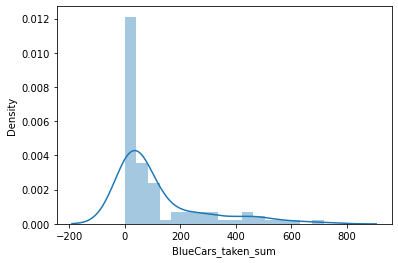

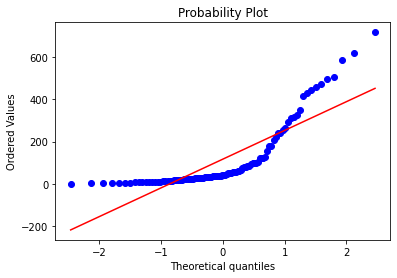

In [993]:

#histogram and normal probability plot
from scipy import stats
sns.distplot(df1['BlueCars_taken_sum']);
fig = plt.figure()
res = stats.probplot(df1['BlueCars_taken_sum'], plot=plt)


 'BlueCars_taken_sum' population distribution is  normal.

In [994]:
df1['dayOfWeek'].value_counts()

5    21
1    19
0    14
4    13
2    12
3    11
6    10
Name: dayOfWeek, dtype: int64

In [995]:
df1['BlueCars_taken_sum'].count()

100

In [996]:
df1['dayOfWeek'].count()

100

In [997]:
#Monday to Sunday
df1['BlueCars_taken_sum'].groupby(df1['dayOfWeek']).count()


dayOfWeek
0    14
1    19
2    12
3    11
4    13
5    21
6    10
Name: BlueCars_taken_sum, dtype: int64

In [998]:

# Changing data type:

#df['BlueCars_taken_sum'] = df['BlueCars_taken_sum'].astype('float')
#df.BlueCars_taken_sum.dtypes

In [999]:
import numpy as np
df_mean=np.mean(df1)
print(df_mean)

Postal code               88442.22
n_daily_data_points        1430.52
dayOfWeek                     2.93
BlueCars_taken_sum          116.89
BlueCars_returned_sum       116.43
Utilib_taken_sum              3.42
Utilib_returned_sum           3.36
Utilib_14_taken_sum           7.65
Utilib_14_returned_sum        7.63
Slots_freed_sum              19.59
Slots_taken_sum              19.53
dtype: float64


In [1000]:
#Generating a sample from our population sample of Autolib Blue cars taken

# generating one row 
rows = df1.sample(frac =.25)
  
# checking if sample is 0.25 times data or not
  
if (0.25*(len('BlueCars_taken_sum'))== len(rows)):
    print( "Cool")
    print(len('BlueCars_taken_sum'), len(rows))
  
# display
rows

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
58,92420,2/4/2018,1440,6,weekend,14,10,0,0,0,0,0,0
27,91370,3/28/2018,1440,2,weekday,7,13,0,0,3,1,0,0
33,92100,6/19/2018,1370,1,weekday,23,36,0,2,2,3,2,1
2,75001,4/26/2018,1440,3,weekday,102,102,3,3,7,7,16,18
76,94100,4/20/2018,1417,4,weekday,4,3,1,0,0,0,0,0
79,94120,2/17/2018,1440,5,weekend,57,57,1,1,8,11,0,0
95,95870,3/13/2018,1440,1,weekday,16,17,0,0,3,2,0,0
89,94410,4/28/2018,1440,5,weekend,33,29,1,2,2,2,0,0
72,93700,2/24/2018,1396,5,weekend,9,9,0,0,1,2,0,0
85,94230,3/7/2018,1440,2,weekday,24,32,2,2,3,3,0,0


As shown in the output image, the length of sample generated is 25% of data frame. Also the sample is generated randomly.

In [1012]:
df1.shape

(100, 13)

In [1001]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             100 non-null    int64 
 1   date                    100 non-null    object
 2   n_daily_data_points     100 non-null    int64 
 3   dayOfWeek               100 non-null    int64 
 4   day_type                100 non-null    object
 5   BlueCars_taken_sum      100 non-null    int64 
 6   BlueCars_returned_sum   100 non-null    int64 
 7   Utilib_taken_sum        100 non-null    int64 
 8   Utilib_returned_sum     100 non-null    int64 
 9   Utilib_14_taken_sum     100 non-null    int64 
 10  Utilib_14_returned_sum  100 non-null    int64 
 11  Slots_freed_sum         100 non-null    int64 
 12  Slots_taken_sum         100 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 10.3+ KB


In [1002]:
df1.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,88442.22000,1430.520000,2.930000,116.890000,116.430000,3.420000,3.360000,7.650000,7.630000,19.590000,19.530000
std,8013.76113,31.541373,2.011357,158.996277,158.366807,5.834727,5.387078,10.489413,10.700378,43.179937,43.119626
min,75001.00000,1203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78105.00000,1439.000000,1.000000,19.750000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92360.00000,1440.000000,3.000000,40.000000,40.500000,1.500000,1.000000,3.500000,3.000000,0.000000,0.000000
75%,93875.00000,1440.000000,5.000000,123.000000,121.000000,4.000000,4.000000,9.250000,10.000000,5.000000,5.000000
max,95880.00000,1440.000000,6.000000,716.000000,697.000000,32.000000,26.000000,50.000000,51.000000,193.000000,187.000000


In [1003]:
#Define 
#Meanscore of the population =125.9
#Mean of sample=128.61
#Standard Deviation= 157.32
#Sample size=100
#alpha(a)= 0.5

#Null Hypothesis =125.9
#Alternative Hypothesis!==125.9
 
x_bar =128.61
mu=125.9
sd_sample=157.32
n=100
t_score=(x_bar- mu)/(sd_sample/(n//2))
t_score

0.8613018052377346

In [1004]:
stats.t.sf(abs(t_score), df=(n-1)) 

0.19557657433152764

In [1005]:
#The p-value would be:

#OUR CODE GOES HERE



from scipy.stats import norm

prob = stats.norm.cdf(t_score)
prob

0.8054640791511911

We fail to Reject the NULL Hypothesis
This is because our P values is greater than the significance/Alpha Scroe(0.5)

In [1006]:
from random import choice
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mu, sigma = 40, 1
df = np.random.normal(mu, sigma, 100)

def get_confidence_interval(variance, sample_mean, sample_size, significance_level):
    margin_of_error = norm.ppf(1 - significance_level/2)*variance/np.sqrt(sample_size)
    return sample_mean - margin_of_error, sample_mean + margin_of_error

sample_size = 100
sample = np.random.choice(df, sample_size)
sample_mean = np.average(sample)
confidence_interval = get_confidence_interval(sigma, sample_mean, sample_size, 0.05)
confidence_interval

(39.42049421940418, 39.8124870163122)

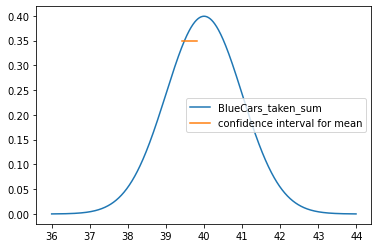

In [1007]:
xs = np.arange(36, 44, 0.01)
ys = norm.pdf(xs, mu, sigma)
plt.plot(xs, ys, label='BlueCars_taken_sum')
plt.plot(confidence_interval, [0.35, 0.35], label='confidence interval for mean')
plt.legend()
plt.show()

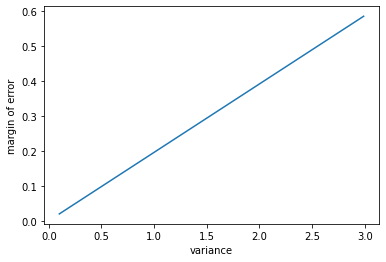

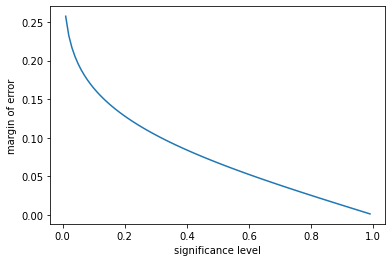

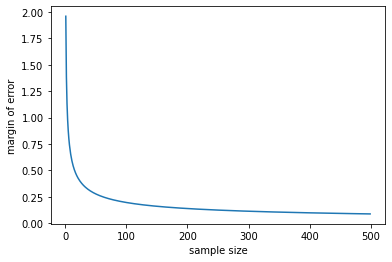

In [1008]:
def get_margin_of_error(variance, sample_size, significance_level):
    return norm.ppf(1 - significance_level/2)*variance/np.sqrt(sample_size)
    
variances = np.arange(0.1, 3, 0.01)
plt.plot(
    variances,
    [get_margin_of_error(v, 100, 0.05) for v in variances]
)
plt.xlabel('variance')
plt.ylabel('margin of error')
plt.show()

significance_levels = np.arange(0, 1, 0.01)
plt.plot(
    significance_levels,
    [get_margin_of_error(1, 100, sl) for sl in significance_levels]
)
plt.xlabel('significance level')
plt.ylabel('margin of error')
plt.show()

sample_sizes = np.arange(1, 500, 1)
plt.plot(
    sample_sizes,
    [get_margin_of_error(1, ss, 0.05) for ss in sample_sizes]
)
plt.xlabel('sample size')
plt.ylabel('margin of error')
plt.show()

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [1010]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?